In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix
import time
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.neural_network import MLPClassifier

In [12]:
df=pd.read_csv('Desktop/2nd Sem/ML/Projects 1/mobile-price-classification/train.csv')


In [13]:
df.price_range.median()
df['Price']=df['price_range'].median()
df.loc[df['price_range'] > df['Price'],'Price']=1
df.loc[df['price_range'] < df['Price'],'Price']=0
df.drop(['price_range'],axis=1,inplace=True)

In [14]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0.0


In [15]:
from sklearn.model_selection import train_test_split # Data split in test and train
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0:20],df['Price'] , test_size=0.3, random_state=100)


In [16]:
#scaling data
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# KNN###

In [8]:
#  Varying the "p" value - Distance Metric 
p = np.arange(1,5,1)
acc_train_dist = []
acc_test_dist = []
for i in p:
    KNN_class = KNeighborsClassifier(n_neighbors=5 , p = i)
    KNN_class.fit(x_train, y_train)
    y_pred_train = KNN_class.predict(x_train)
    y_pred_test = KNN_class.predict(x_test)
    acc_train_dist.append(accuracy_score(y_train,y_pred_train))
    acc_test_dist.append(accuracy_score(y_test,y_pred_test))

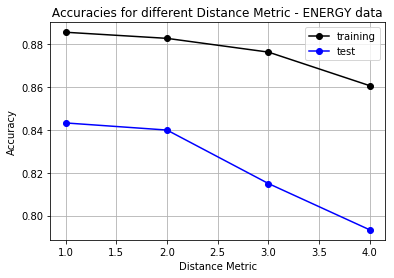

In [27]:
## Plotting the graph for the different degrees of polynomial
plt.plot(p,acc_train_dist,marker='o',markersize=6,color='Black',label='training')
plt.plot(p,acc_test_dist,marker='o',markersize=6,color='Blue',label='test')
plt.title(" Accuracies for different Distance Metric - Mobile price data ")
plt.xlabel("Distance Metric")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [30]:
# Varying the Neighbor values in the classifier for p=1
n_neighbors = np.arange(1,20,1)
acc_train_neighbor = []
acc_test_neighbor = []
for i in n_neighbors:
    KNN_class = KNeighborsClassifier(n_neighbors=i , p = 1)
    KNN_class.fit(x_train, y_train)
    y_pred_train = KNN_class.predict(x_train)
    y_pred_test = KNN_class.predict(x_test)
    acc_train_neighbor.append(accuracy_score(y_train,y_pred_train))
    acc_test_neighbor.append(accuracy_score(y_test,y_pred_test))

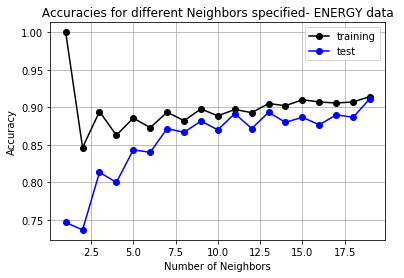

In [31]:
## Plotting the graph for the different Neighbors with p=1 
plt.plot(n_neighbors,acc_train_neighbor,marker='o',markersize=6,color='black',label='training')
plt.plot(n_neighbors,acc_test_neighbor,marker='o',markersize=6,color='blue',label='test')
plt.title(" Accuracies for different Neighbors specified- ENERGY data ")
plt.xlabel("Number of Neighbors")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [32]:
# Varying the "weight" parameter
weight = ['uniform','distance']
acc_train_weight = []
acc_test_weight = []
for i in range(len(weight)):
    KNN_class = KNeighborsClassifier(n_neighbors=18 , p = 1,weights = weight[i] )
    KNN_class.fit(x_train, y_train)
    y_pred_train = KNN_class.predict(x_train)
    y_pred_test = KNN_class.predict(x_test)
    acc_train_weight.append(accuracy_score(y_train,y_pred_train))
    acc_test_weight.append(accuracy_score(y_test,y_pred_test))

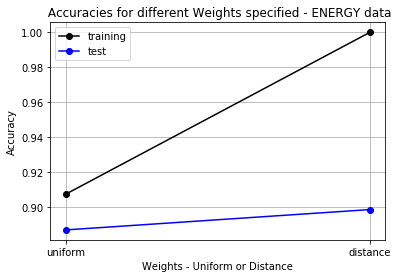

In [33]:
## Plotting the graph for the different Neighbors with p=1 
plt.plot(weight,acc_train_weight,marker='o',markersize=6,color='black',label='training')
plt.plot(weight,acc_test_weight,marker='o',markersize=6,color='blue',label='test')
plt.title(" Accuracies for different Weights specified - ENERGY data")
plt.xlabel("Weights - Uniform or Distance")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [34]:
# Varying the "algorithm" parameter
algo = ['auto','ball_tree','kd_tree','brute']
acc_train_algo = []
acc_test_algo = []
for i in algo:
    KNN_class = KNeighborsClassifier( algorithm= i ,p=1 )
    KNN_class.fit(x_train, y_train)
    y_pred_train = KNN_class.predict(x_train)
    y_pred_test = KNN_class.predict(x_test)
    acc_train_algo.append(accuracy_score(y_train,y_pred_train))
    acc_test_algo.append(accuracy_score(y_test,y_pred_test))

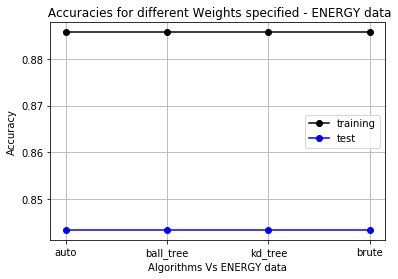

In [35]:
## Plotting the graph for the different Neighbors with p=2 
plt.plot(algo,acc_train_algo,marker='o',markersize=6,color='black',label='training')
plt.plot(algo,acc_test_algo,marker='o',markersize=6,color='blue',label='test')
plt.title(" Accuracies for different Weights specified - ENERGY data")
plt.xlabel("Algorithms Vs ENERGY data")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [36]:
### building the classifier
KNN_class = KNeighborsClassifier(n_neighbors=4 , p = 1  )
KNN_class.fit(x_train, y_train)

### predicting the test set result
y_pred = KNN_class.predict(x_test)

### Finding the accuracy
Acc_Score = accuracy_score(y_test, y_pred)
print(Acc_Score)

### create confusion matrix
con_mat = confusion_matrix(y_test , y_pred)
print(con_mat)



0.8
[[275  30]
 [ 90 205]]


0.7628654523189958


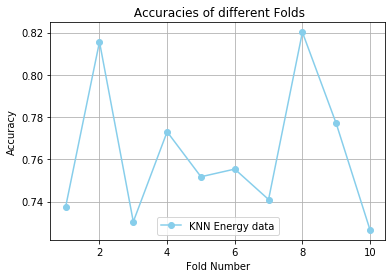

In [37]:
from sklearn.model_selection import cross_val_score
accuracies_1 = cross_val_score(estimator = KNN_class, X = x_train, y = y_train, cv = 10)
mean_acc_1 = accuracies_1.mean()
print(mean_acc_1)

plt.plot(np.arange(1,11,1),accuracies_1,marker = 'o' , markersize = 6 , color = 'skyblue',label='KNN Energy data')
plt.title(" Accuracies of different Folds")
plt.xlabel("Fold Number")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

/Users/sampathgubbala/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/sampathgubbala/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/sampathgubbala/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


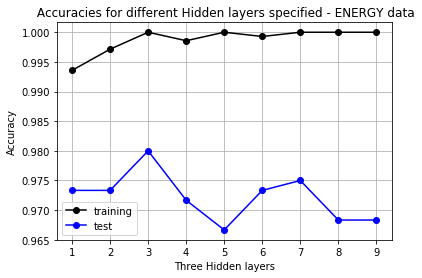

In [38]:
from sklearn.neural_network import MLPClassifier

## Expermineting with differnet neurons in hidden layers
layer_size = np.arange(1,10,1)
acc_train_layers = []
acc_test_layers = []
for i in layer_size:
    ANN_class = MLPClassifier(hidden_layer_sizes= (i,i,i),
                          activation='relu', 
                          alpha=0.0001, 
                          batch_size='auto' ,
                          solver= 'adam',
                          learning_rate= 'constant',
                          max_iter = 400,
                          random_state= 0 )
    ANN_class.fit(x_train, y_train)
    y_pred_train = ANN_class.predict(x_train)
    y_pred_test = ANN_class.predict(x_test)
    acc_train_layers.append(accuracy_score(y_train,y_pred_train))
    acc_test_layers.append(accuracy_score(y_test,y_pred_test))
    
## Plotting the graph for the different hidden layer neurons 
plt.plot(layer_size,acc_train_layers,marker='o',markersize=6,color='black',label='training')
plt.plot(layer_size,acc_test_layers,marker='o',markersize=6,color='blue',label='test')
plt.title(" Accuracies for different Hidden layers specified - ENERGY data")
plt.xlabel("Three Hidden layers")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [53]:
## Try with different hidden layers

/Users/sampathgubbala/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/sampathgubbala/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/sampathgubbala/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


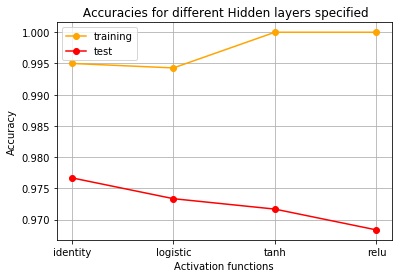

In [39]:
## Expermineting with differnet activation functions
function = ['identity', 'logistic', 'tanh', 'relu']
acc_train_func = []
acc_test_func = []
for i in function:
    ANN_class = MLPClassifier(hidden_layer_sizes= (8,8,8),
                          activation= i , 
#                          alpha=0.0001, 
#                          batch_size='auto' ,
#                          solver= 'adam',
#                          learning_rate= 'constant',
#                          max_iter = 400,
                          random_state= 0 )
    ANN_class.fit(x_train, y_train)
    y_pred_train = ANN_class.predict(x_train)
    y_pred_test = ANN_class.predict(x_test)
    acc_train_func.append(accuracy_score(y_train,y_pred_train))
    acc_test_func.append(accuracy_score(y_test,y_pred_test))
    
## Plotting the graph for the different hidden layer neurons 
plt.plot(function,acc_train_func,marker='o',markersize=6,color='orange',label='training')
plt.plot(function,acc_test_func,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies for different Hidden layers specified")
plt.xlabel("Activation functions")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

/Users/sampathgubbala/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


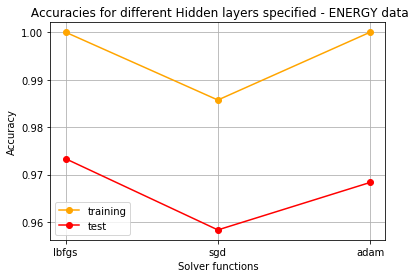

In [40]:
## Expermineting with differnet solver functions
types = ['lbfgs', 'sgd', 'adam']
acc_train_type = []
acc_test_type = []
for i in types:
    ANN_class = MLPClassifier(hidden_layer_sizes= (8,8,8),
                          activation= 'relu' , 
                          solver = i ,
                          alpha=0.0001, 
                          batch_size='auto' ,
                          learning_rate= 'constant',
                          max_iter = 400,
                          random_state= 0 )
    ANN_class.fit(x_train, y_train)
    y_pred_train = ANN_class.predict(x_train)
    y_pred_test = ANN_class.predict(x_test)
    acc_train_type.append(accuracy_score(y_train,y_pred_train))
    acc_test_type.append(accuracy_score(y_test,y_pred_test))
    
## Plotting the graph for the different hidden layer neurons 
plt.plot(types,acc_train_type,marker='o',markersize=6,color='orange',label='training')
plt.plot(types,acc_test_type,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies for different Hidden layers specified - ENERGY data")
plt.xlabel("Solver functions")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [4]:
# roc curve and auc

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [17]:
model_knn = KNeighborsClassifier(algorithm =  'ball_tree',metric = 'manhattan',
                                 n_neighbors= 7,weights= 'uniform')
model_knn.fit(x_train , y_train)

y_scores = model_knn.predict_proba(x_test)
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test, y_scores[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

In [18]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='gini' ,max_depth=12,  max_leaf_nodes=1500, random_state= 5 )
dtree.fit(x_train, y_train)
y_scores = dtree.predict_proba(x_test)
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, y_scores[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [19]:
from sklearn.linear_model import LogisticRegression


model_log = LogisticRegression(solver='lbfgs')
model_log.fit(x_train, y_train)
y_scores = model_log.predict_proba(x_test)
fpr_log, tpr_log, threshold_log = roc_curve(y_test, y_scores[:, 1])
roc_auc_log = auc(fpr_log, tpr_log)

In [20]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf', gamma='auto',random_state=5, probability=True)
model_svm.fit(x_train,y_train)
y_scores = model_svm.predict_proba(x_test)
fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, y_scores[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

In [21]:
from sklearn.neural_network import MLPClassifier
model_ann = MLPClassifier(hidden_layer_sizes= (10,10,10,10),
                          activation= 'relu' ,
                          solver= 'adam',max_iter = 1000,
                          random_state= 0 )
model_ann.fit(x_train,y_train)
y_scores = model_ann.predict_proba(x_test)
fpr_ann, tpr_ann, threshold_ann = roc_curve(y_test, y_scores[:, 1])
roc_auc_ann = auc(fpr_ann, tpr_ann)

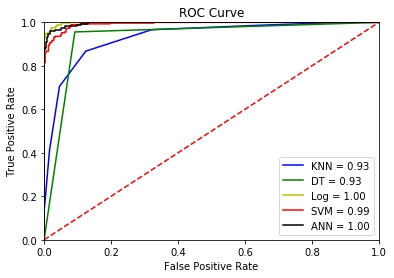

In [22]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_knn, tpr_knn, 'b', label = 'KNN = %0.2f' % roc_auc_knn)
plt.plot(fpr_dt, tpr_dt, 'g', label = 'DT = %0.2f' % roc_auc_dt)
plt.plot(fpr_log, tpr_log, 'y', label = 'Log = %0.2f' % roc_auc_log)
plt.plot(fpr_svm, tpr_svm, 'r', label = 'SVM = %0.2f' % roc_auc_svm)
plt.plot(fpr_ann, tpr_ann, 'black', label = 'ANN = %0.2f' % roc_auc_ann)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()